### Lab 4


### Linear Classifier


In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from linear_classifier import LinearClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

# Set style for better visualizations
# plt.style.use('seaborn')
# sns.set_palette("husl")

Importing Dataset

In [38]:
# Load the mushroom dataset
data = pd.read_csv('../data/heart.csv')
data["output"] = data["output"].replace({0: -1})
data.head(5)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
sc = MinMaxScaler()
columns = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
data[columns] = sc.fit_transform(data[columns])

Y = data["output"].to_numpy()
X = data.drop(["output"], axis=1).to_numpy()

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, Y, test_size=0.2)
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

#### Training

In [40]:
# Define training configurations
base_params = {
    'n_iter': 10000,
    'track_margins': True
}

configs = [
    {
        'name': 'Classic with L2',
        'params': {
            **base_params,
            'lr': 0.001,
            'lambda_': 0.99,
            'reg': 0.1,
            'momentum': False,
            'optimize_lr': False,
            'use_margins': False
        },
        'init_method': 'random'
    },
    {
        'name': 'Classic with L2 + Momentum',
        'params': {
            **base_params,
            'lr': 0.001,
            'lambda_': 0.99,
            'reg': 0.01,
            'momentum': True,
            'gamma': 0.9,
            'optimize_lr': False,
            'use_margins': False
        },
        'init_method': 'random'
    },
    {
        'name': 'Classic with L2 + Momentum + Optimal LR',
        'params': {
            **base_params,
            'lr': 0.001,
            'lambda_': 0.99,
            'reg': 0.01,
            'momentum': True,
            'gamma': 0.9,
            'optimize_lr': True,
            'use_margins': False
        },
        'init_method': 'random'
    },
    {
    'name': 'Multi-start Random Init',
    'params': {
        **base_params,
        'lr': 0.001,
        'lambda_': 0.99,
        'reg': 0.01,
        'momentum': True,
        'gamma': 0.9,
        'optimize_lr': False,
        'use_margins': False
    },
    'init_method': 'random',
    'use_multistart': True,
    'n_starts': 10  # Number of random initializations
}
]

# Advanced scenarios using the best base configuration
advanced_configs = [
    {
        'name': 'Correlation Init',
        'params': {
            **base_params,
            'lr': 0.001,
            'lambda_': 0.99,
            'reg': 0.1,
            'momentum': True,
            'optimize_lr': False,
            'use_margins': False
        },  # Using Momentum configuration
        'init_method': 'correlation'
    },
    {
        'name': 'Random Sampling',
        'params': {
            **configs[1]['params'],
            'use_margins': False
        },
        'init_method': 'random'
    },
    {
        'name': 'Margin-based Sampling',
        'params': {
            **configs[1]['params'],
            'use_margins': True
        },
        'init_method': 'random'
    }
]

results = {}

In [41]:
def plot_margin(margins,title):
    margins = np.sort(margins.flatten())
    plt.figure(figsize=(10, 6))
    plt.plot(margins, c='k', linewidth=3)

    plt.axhline(y=0, c='k', linewidth=0.5)

    x = np.arange(len(margins))
    plt.gca().fill_between(x, margins, where=(margins>=0.3), color='#00ff00', alpha=0.5, label='Confident Correct')
    plt.gca().fill_between(x, margins, where=(margins<=-0.3), color='#ff0000', alpha=0.5, label='Confident Wrong') 
    plt.gca().fill_between(x, margins, where=np.bitwise_and(margins >= -0.3, margins <= 0.3), color='#ffff00', alpha=0.5, label='Uncertain')
    
    plt.ylabel("Margin")
    plt.xlabel("Sample Index")
    plt.title("Margin Distribution - " + title)
    plt.legend()
    # plt.gcf().set_size_inches(5, 3)


Training base configurations...

Training Classic with L2:
Parameters: {'n_iter': 10000, 'track_margins': True, 'lr': 0.001, 'lambda_': 0.99, 'reg': 0.1, 'momentum': False, 'optimize_lr': False, 'use_margins': False}


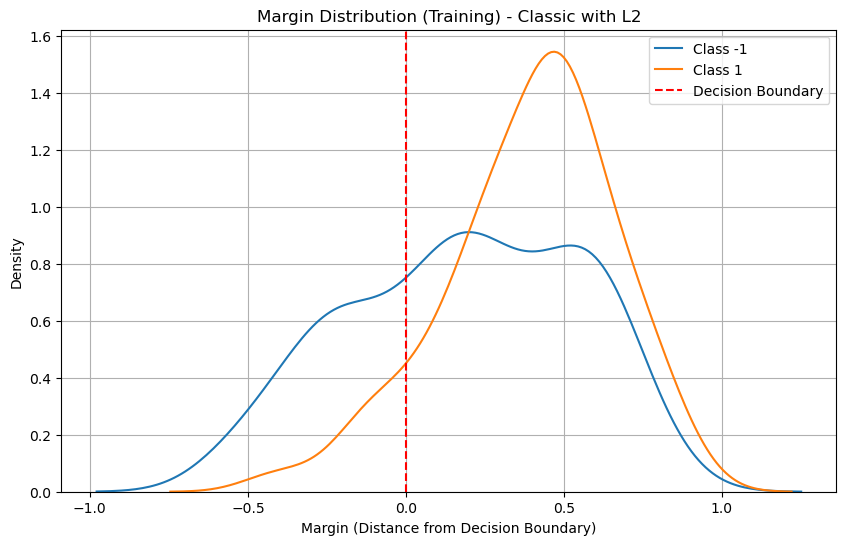


Margin Statistics:
Mean margin: 0.2997
Std margin: 0.3268
Min margin: -0.5548
Max margin: 0.9172
Median margin: 0.3398
Correctly classified rate: 0.8182


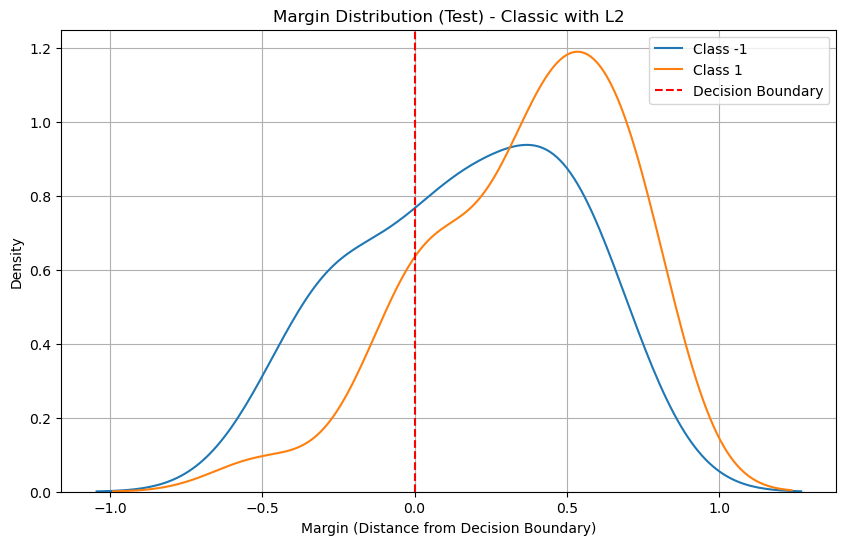


Margin Statistics:
Mean margin: 0.2617
Std margin: 0.3439
Min margin: -0.5209
Max margin: 0.7520
Median margin: 0.3176
Correctly classified rate: 0.7705

Performance metrics:

Classification Report:
------------------------------------------------------------
Overall Accuracy: 0.7705

Per-class metrics:
------------------------------------------------------------
     Class  Precision     Recall         F1    Support
------------------------------------------------------------
        -1     0.8750     0.6562     0.7500         32
         1     0.7027     0.8966     0.7879         29
------------------------------------------------------------

Training Classic with L2 + Momentum:
Parameters: {'n_iter': 10000, 'track_margins': True, 'lr': 0.001, 'lambda_': 0.99, 'reg': 0.01, 'momentum': True, 'gamma': 0.9, 'optimize_lr': False, 'use_margins': False}


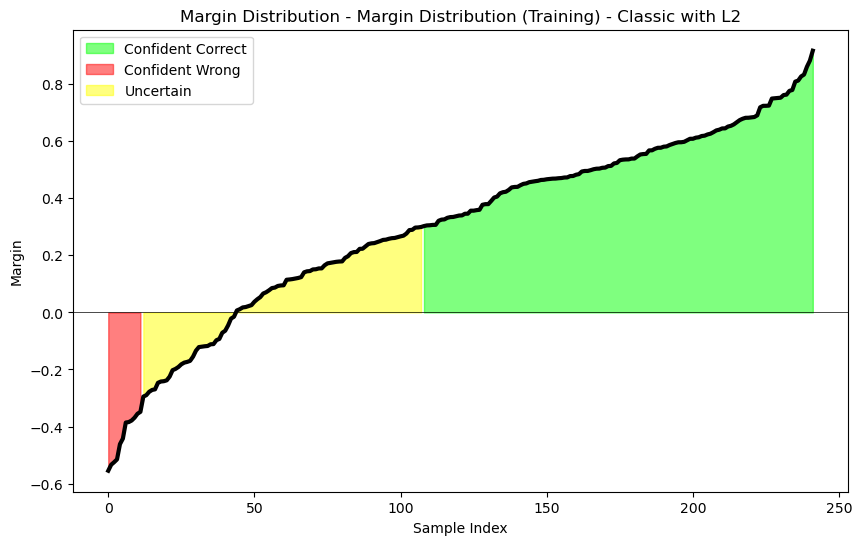

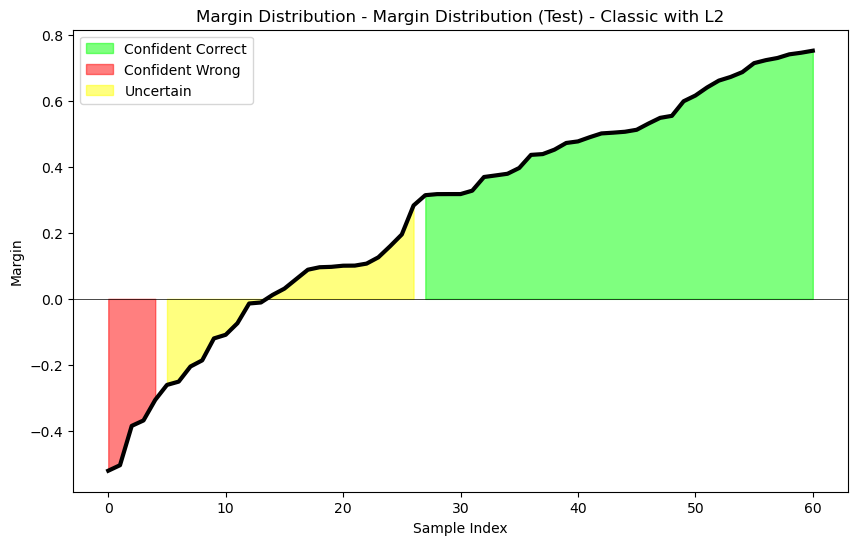

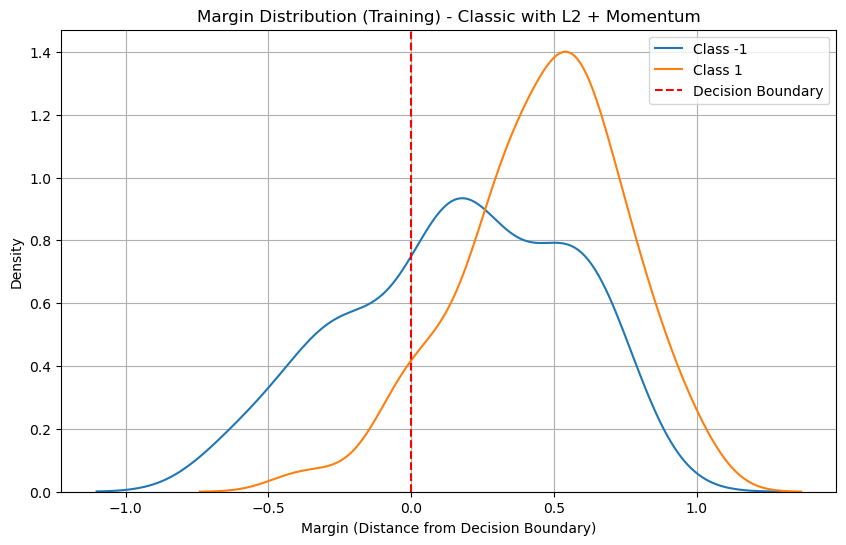


Margin Statistics:
Mean margin: 0.3312
Std margin: 0.3602
Min margin: -0.6521
Max margin: 1.0454
Median margin: 0.3924
Correctly classified rate: 0.8264


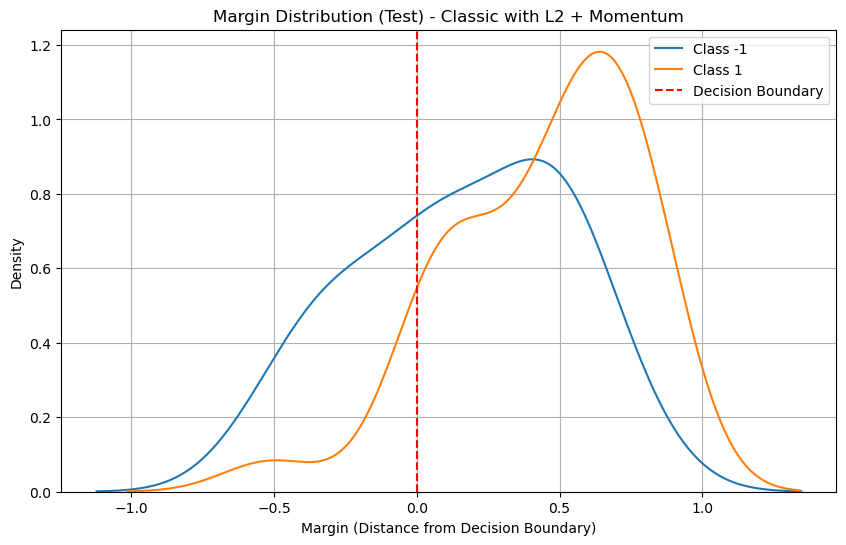


Margin Statistics:
Mean margin: 0.2942
Std margin: 0.3739
Min margin: -0.5652
Max margin: 0.8375
Median margin: 0.3669
Correctly classified rate: 0.8033

Performance metrics:

Classification Report:
------------------------------------------------------------
Overall Accuracy: 0.8033

Per-class metrics:
------------------------------------------------------------
     Class  Precision     Recall         F1    Support
------------------------------------------------------------
        -1     0.9167     0.6875     0.7857         32
         1     0.7297     0.9310     0.8182         29
------------------------------------------------------------

Training Classic with L2 + Momentum + Optimal LR:
Parameters: {'n_iter': 10000, 'track_margins': True, 'lr': 0.001, 'lambda_': 0.99, 'reg': 0.01, 'momentum': True, 'gamma': 0.9, 'optimize_lr': True, 'use_margins': False}


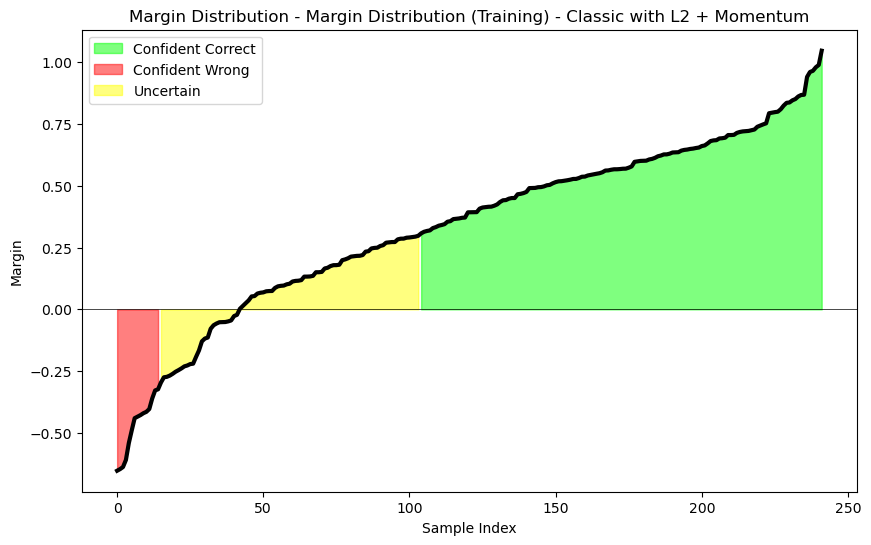

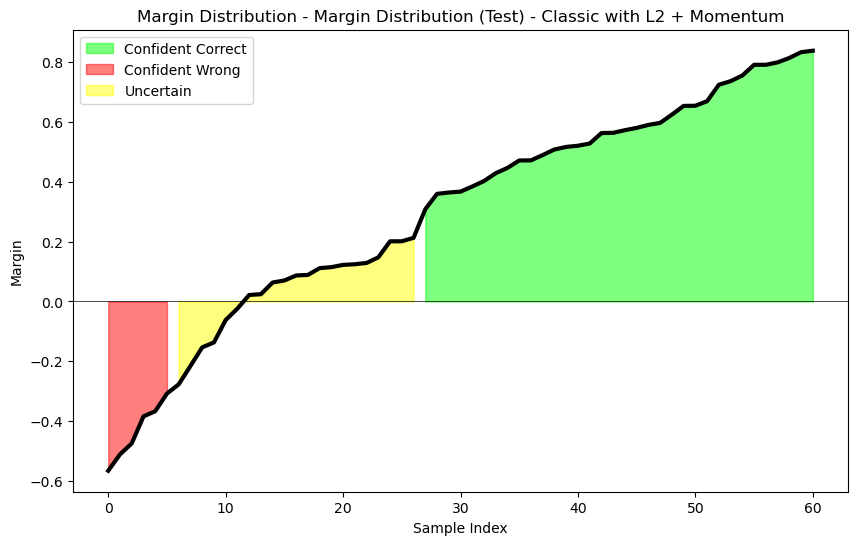

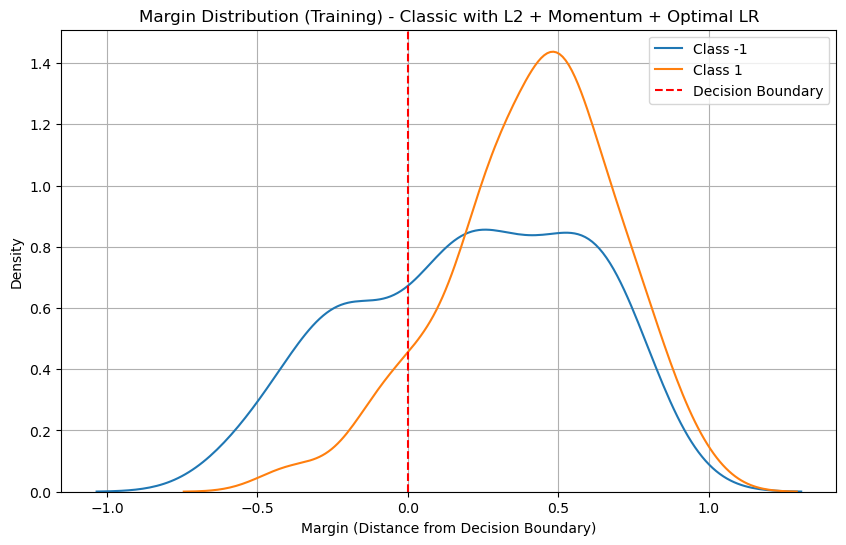


Margin Statistics:
Mean margin: 0.3213
Std margin: 0.3410
Min margin: -0.5879
Max margin: 0.9766
Median margin: 0.3688
Correctly classified rate: 0.8223


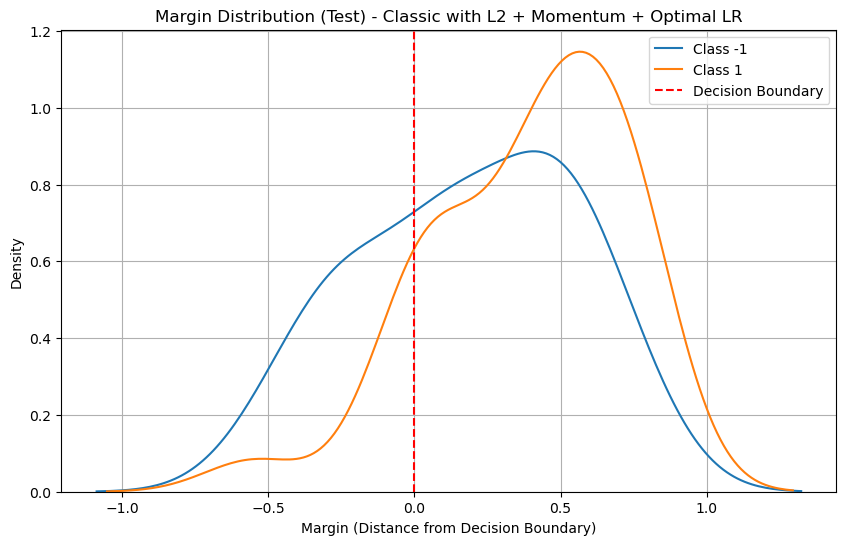


Margin Statistics:
Mean margin: 0.2816
Std margin: 0.3588
Min margin: -0.5497
Max margin: 0.7923
Median margin: 0.3402
Correctly classified rate: 0.7869

Performance metrics:

Classification Report:
------------------------------------------------------------
Overall Accuracy: 0.7869

Per-class metrics:
------------------------------------------------------------
     Class  Precision     Recall         F1    Support
------------------------------------------------------------
        -1     0.8800     0.6875     0.7719         32
         1     0.7222     0.8966     0.8000         29
------------------------------------------------------------

Training Multi-start Random Init:
Parameters: {'n_iter': 10000, 'track_margins': True, 'lr': 0.001, 'lambda_': 0.99, 'reg': 0.01, 'momentum': True, 'gamma': 0.9, 'optimize_lr': False, 'use_margins': False}
Performing 10 random initializations...
Start 1/10 - Test accuracy: 0.7869
New best score: 0.7869
Start 2/10 - Test accuracy: 0.8033
New be

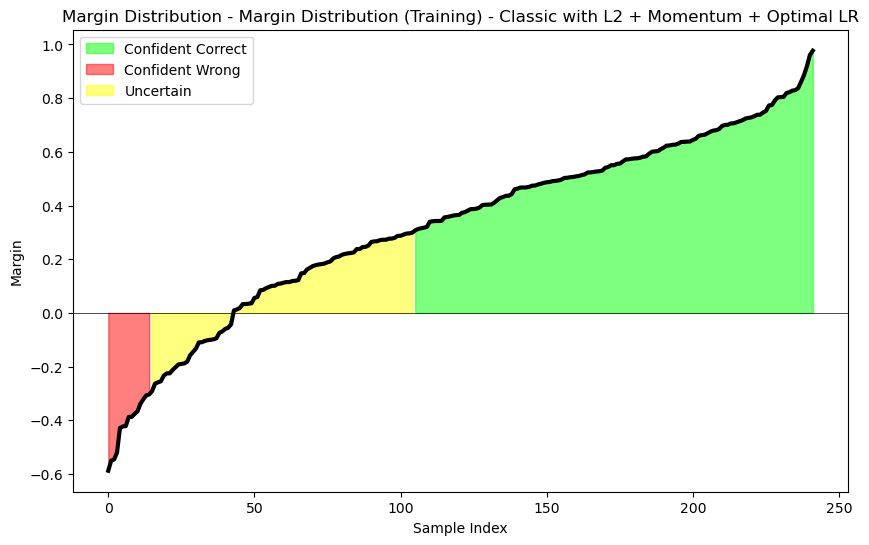

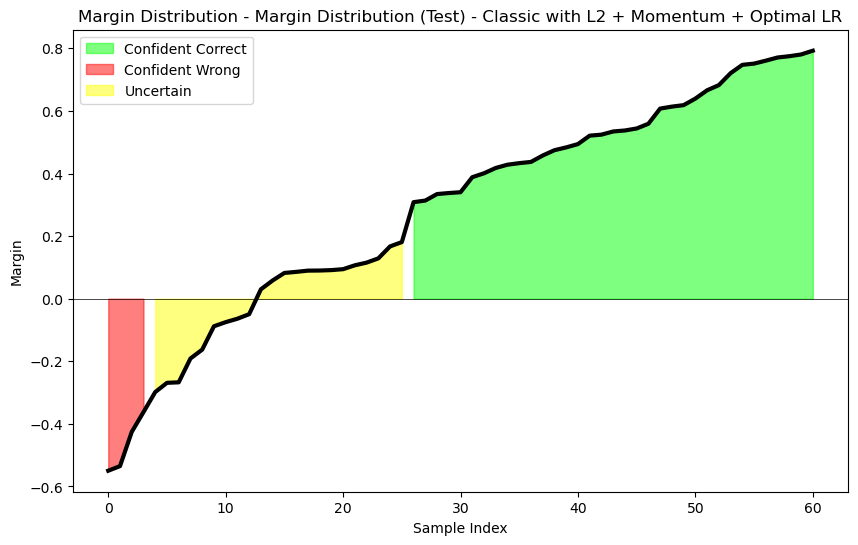

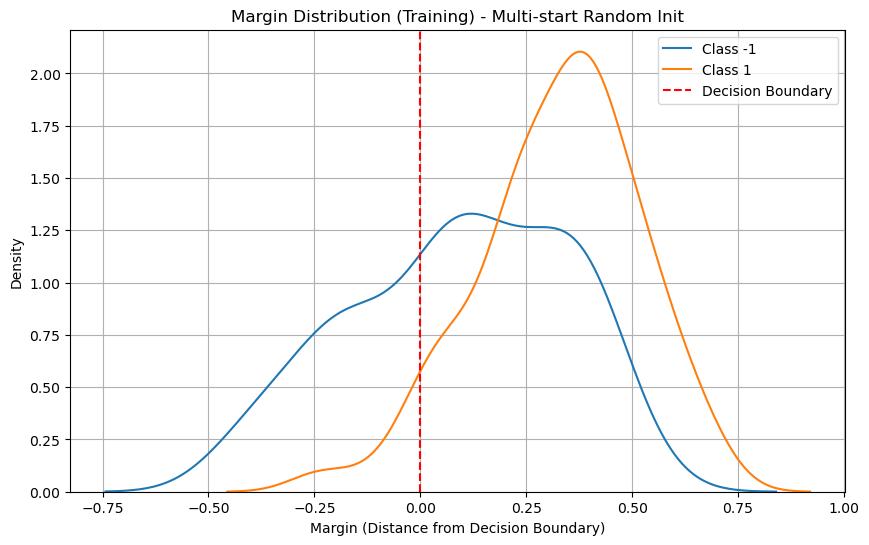


Margin Statistics:
Mean margin: 0.2227
Std margin: 0.2480
Min margin: -0.4438
Max margin: 0.7069
Median margin: 0.2620
Correctly classified rate: 0.8306


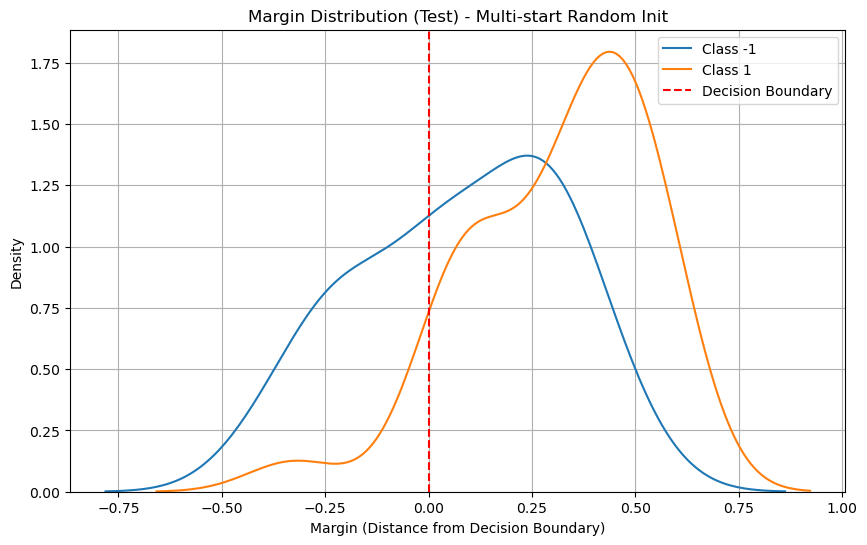


Margin Statistics:
Mean margin: 0.1897
Std margin: 0.2575
Min margin: -0.4115
Max margin: 0.5895
Median margin: 0.2376
Correctly classified rate: 0.8197

Performance metrics:

Classification Report:
------------------------------------------------------------
Overall Accuracy: 0.8197

Per-class metrics:
------------------------------------------------------------
     Class  Precision     Recall         F1    Support
------------------------------------------------------------
        -1     0.9565     0.6875     0.8000         32
         1     0.7368     0.9655     0.8358         29
------------------------------------------------------------

Training advanced scenarios...

Training Correlation Init:
Parameters: {'n_iter': 10000, 'track_margins': True, 'lr': 0.001, 'lambda_': 0.99, 'reg': 0.1, 'momentum': True, 'optimize_lr': False, 'use_margins': False}


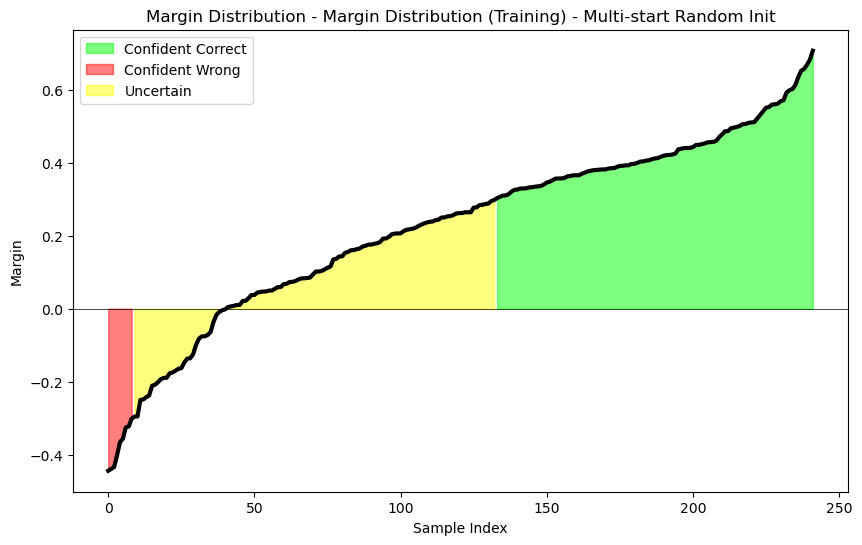

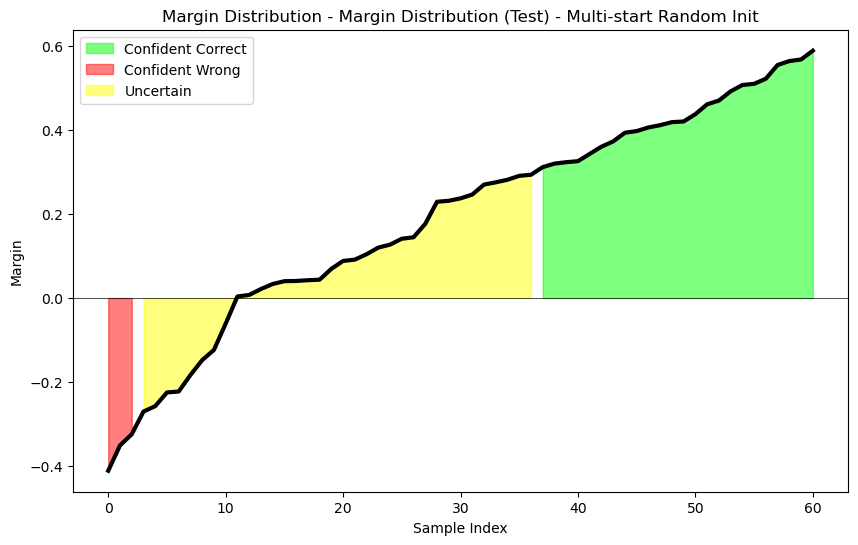

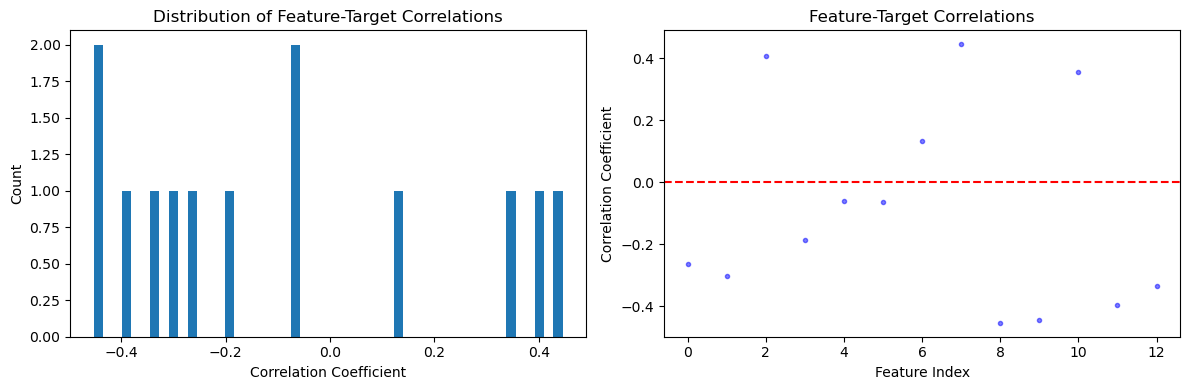


Correlation Statistics:
Mean absolute correlation: 0.2962
Max absolute correlation: 0.4529
Number of features with |correlation| > 0.1: 11


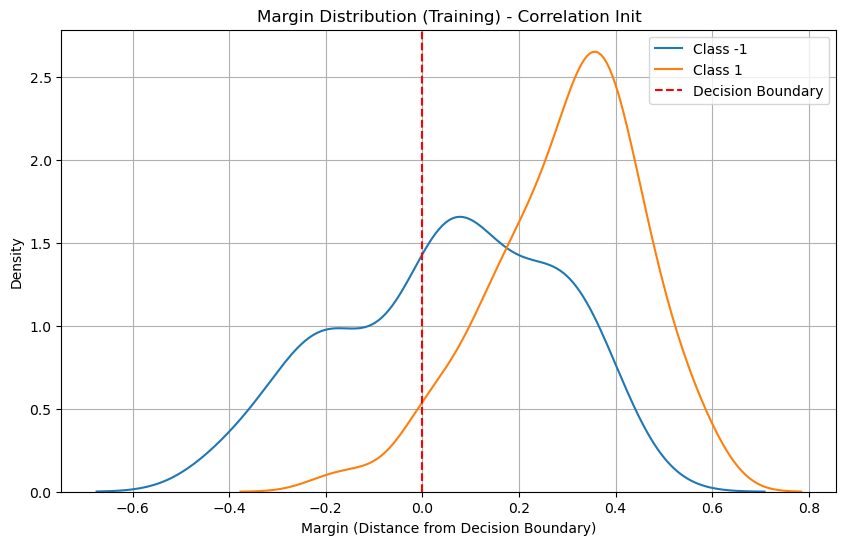


Margin Statistics:
Mean margin: 0.1906
Std margin: 0.2223
Min margin: -0.4158
Max margin: 0.6067
Median margin: 0.2414
Correctly classified rate: 0.8264


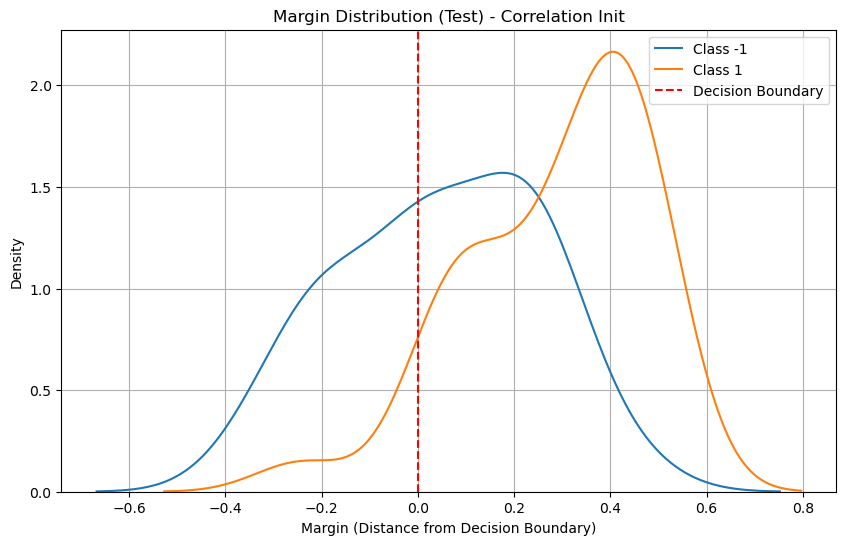


Margin Statistics:
Mean margin: 0.1613
Std margin: 0.2282
Min margin: -0.3572
Max margin: 0.5116
Median margin: 0.2140
Correctly classified rate: 0.8033

Best performance metrics:

Classification Report:
------------------------------------------------------------
Overall Accuracy: 0.8033

Per-class metrics:
------------------------------------------------------------
     Class  Precision     Recall         F1    Support
------------------------------------------------------------
        -1     0.9545     0.6562     0.7778         32
         1     0.7179     0.9655     0.8235         29
------------------------------------------------------------

Training Random Sampling:
Parameters: {'n_iter': 10000, 'track_margins': True, 'lr': 0.001, 'lambda_': 0.99, 'reg': 0.01, 'momentum': True, 'gamma': 0.9, 'optimize_lr': False, 'use_margins': False}
Performing 5 runs...
Run 1 test accuracy: 0.7705
Run 2 test accuracy: 0.7377
Run 3 test accuracy: 0.7869
Run 4 test accuracy: 0.7541
Run 5 tes

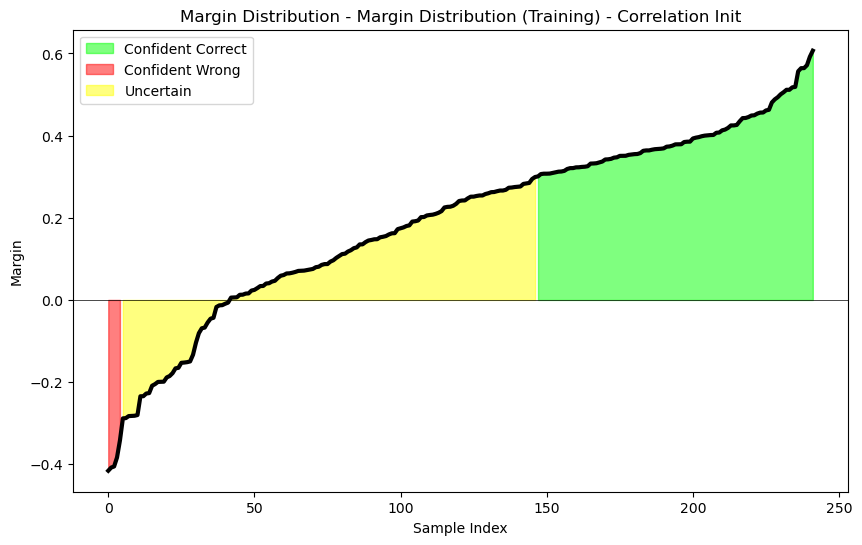

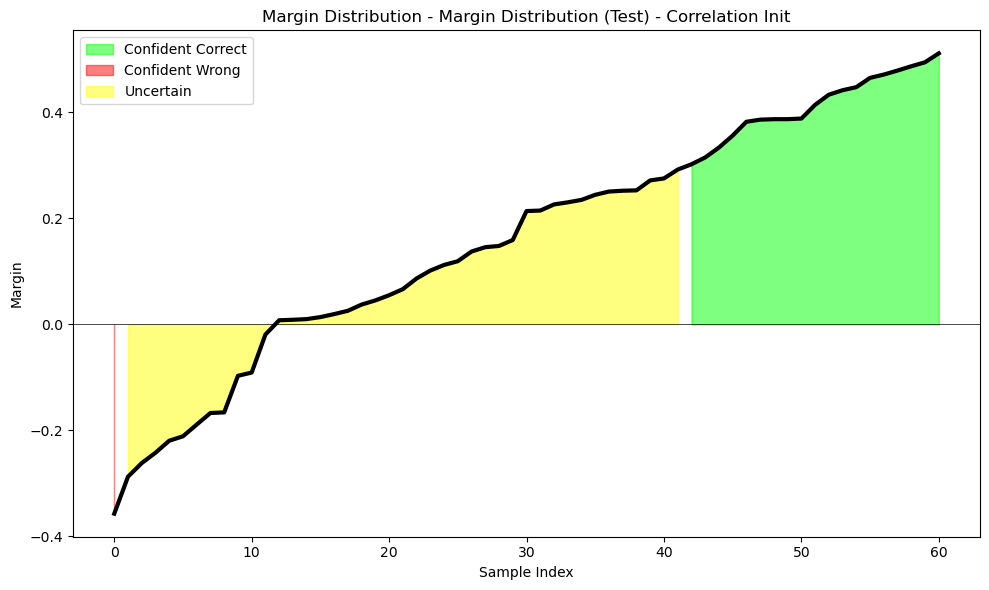


Final Comparison:

Classic with L2:
------------------------------------------------------------
Training Accuracy: 0.8182
Test Accuracy: 0.7705

Classic with L2 + Momentum:
------------------------------------------------------------
Training Accuracy: 0.8264
Test Accuracy: 0.8033

Classic with L2 + Momentum + Optimal LR:
------------------------------------------------------------
Training Accuracy: 0.8223
Test Accuracy: 0.7869

Multi-start Random Init:
------------------------------------------------------------
Training Accuracy: 0.8306
Test Accuracy: 0.8197

Correlation Init:
------------------------------------------------------------
Training Accuracy: 0.8264
Test Accuracy: 0.8033

Random Sampling:
------------------------------------------------------------
Training Accuracy: 0.8182
Test Accuracy: 0.7869

Margin-based Sampling:
------------------------------------------------------------
Training Accuracy: 0.8223
Test Accuracy: 0.7869

Reference (SGD):
------------------------

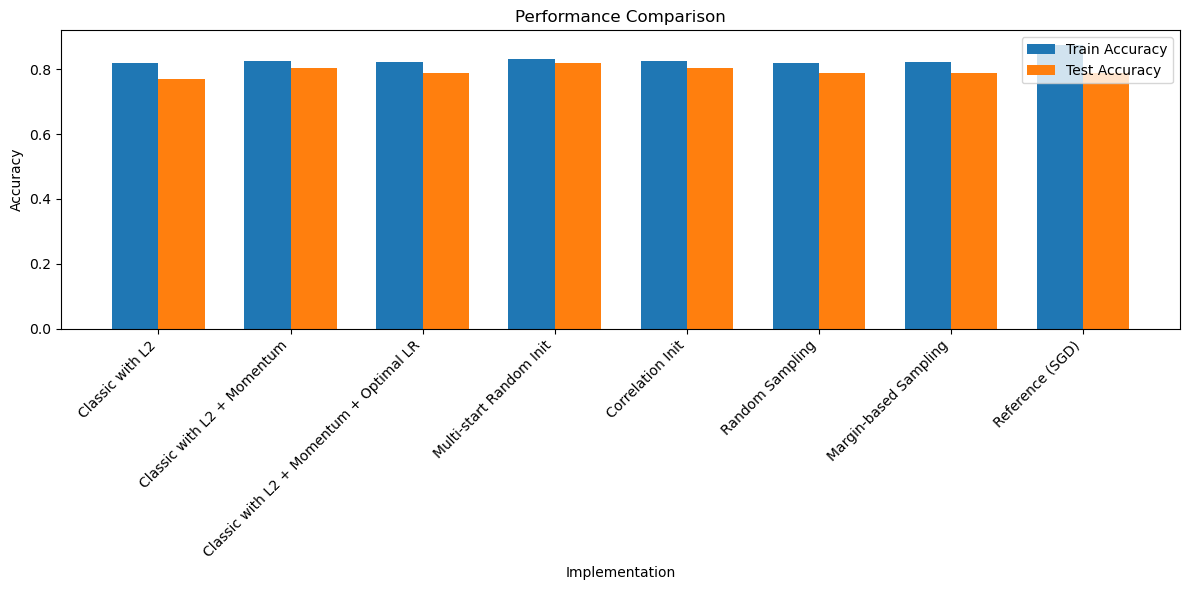

In [42]:


# Train and evaluate base configurations
print("\nTraining base configurations...")
for config in configs:
    print(f"\nTraining {config['name']}:")
    print("Parameters:", config['params'])
    
    if config.get('use_multistart', False):
        # Multi-start implementation
        n_starts = config.get('n_starts', 10)
        best_score = 0
        best_clf = None
        
        print(f"Performing {n_starts} random initializations...")
        for i in range(n_starts):
            clf = LinearClassifier(n_features=X_train_scaled.shape[1])
            clf.init_weights(method=config['init_method'])
            clf.fit(X_train_scaled, y_train, **config['params'])
            
            test_score = clf.score(X_test_scaled, y_test)
            print(f"Start {i+1}/{n_starts} - Test accuracy: {test_score:.4f}")
            
            if test_score > best_score:
                best_score = test_score
                best_clf = clf
                print(f"New best score: {best_score:.4f}")
        
        clf = best_clf  # Use the best classifier for results
    else:
        # Original single-start implementation
        clf = LinearClassifier(n_features=X_train_scaled.shape[1])
        clf.init_weights(method=config['init_method'])
        clf.fit(X_train_scaled, y_train, **config['params'])
    
    # Store results
    results[config['name']] = {
        'train_score': clf.score(X_train_scaled, y_train),
        'test_score': clf.score(X_test_scaled, y_test),
        'classifier': clf
    }

    clf.plot_margin_distribution(X_train_scaled, y_train, title=f"Margin Distribution (Training) - {config['name']}")
    clf.plot_margin_distribution(X_test_scaled, y_test, title=f"Margin Distribution (Test) - {config['name']}")
    plot_margin(clf._compute_margins(X_train_scaled,y_train),title=f"Margin Distribution (Training) - {config['name']}")
    plot_margin(clf._compute_margins(X_test_scaled,y_test),title=f"Margin Distribution (Test) - {config['name']}")
    
    # Print performance
    print(f"\nPerformance metrics:")
    clf.print_classification_report(X_test_scaled, y_test)

# Train and evaluate advanced scenarios
print("\nTraining advanced scenarios...")
for config in advanced_configs:
    print(f"\nTraining {config['name']}:")
    print("Parameters:", config['params'])
    
    if config['name'] == 'Correlation Init':
        # Single run with correlation initialization
        clf = LinearClassifier(n_features=X_train_scaled.shape[1])
        clf.init_weights(method='correlation', X=X_train_scaled, y=y_train)
        clf.plot_feature_correlations()
        clf.fit(X_train_scaled, y_train, **config['params'])
        
        results[config['name']] = {
            'train_score': clf.score(X_train_scaled, y_train),
            'test_score': clf.score(X_test_scaled, y_test),
            'classifier': clf
        }

        clf.plot_margin_distribution(X_train_scaled, y_train, title=f"Margin Distribution (Training) - {config['name']}")
        clf.plot_margin_distribution(X_test_scaled, y_test, title=f"Margin Distribution (Test) - {config['name']}") 
        plot_margin(clf._compute_margins(X_train_scaled,y_train),title=f"Margin Distribution (Training) - {config['name']}")
        plot_margin(clf._compute_margins(X_test_scaled,y_test),title=f"Margin Distribution (Test) - {config['name']}")
    else:
        # Multiple runs for sampling strategies
        n_tries = 5
        best_score = 0
        best_clf = None
        
        print(f"Performing {n_tries} runs...")
        for i in range(n_tries):
            clf = LinearClassifier(n_features=X_train_scaled.shape[1])
            clf.init_weights(method=config['init_method'])
            clf.fit(X_train_scaled, y_train, **config['params'])
            
            test_score = clf.score(X_test_scaled, y_test)
            print(f"Run {i+1} test accuracy: {test_score:.4f}")
            
            if test_score > best_score:
                best_score = test_score
                best_clf = clf
        
        results[config['name']] = {
            'train_score': best_clf.score(X_train_scaled, y_train),
            'test_score': best_score,
            'classifier': best_clf
        }
    
    # Print performance
    print(f"\nBest performance metrics:")
    results[config['name']]['classifier'].print_classification_report(X_test_scaled, y_test)

# Add reference implementation using SGDClassifier
print("\nTraining reference implementation (SGDClassifier)...")
ref_clf = SGDClassifier(
    loss='squared_hinge',  # Equivalent to quadratic loss
    penalty='l2',
    alpha=0.01,  # L2 regularization strength
    learning_rate='constant',
    eta0=0.01,  # Learning rate
    max_iter=5000,
    tol=1e-3,
    random_state=42
)

ref_clf.fit(X_train_scaled, y_train)

# Store reference results
results['Reference (SGD)'] = {
    'train_score': ref_clf.score(X_train_scaled, y_train),
    'test_score': ref_clf.score(X_test_scaled, y_test),
    'classifier': ref_clf
}

# Print reference performance
print("\nReference implementation performance:")
print("-" * 60)
print(f"Training accuracy: {results['Reference (SGD)']['train_score']:.4f}")
print(f"Test accuracy: {results['Reference (SGD)']['test_score']:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, ref_clf.predict(X_test_scaled)))



plt.tight_layout()
plt.show()

# Print final comparison
print("\nFinal Comparison:")
print("=" * 80)
for name, result in results.items():
    print(f"\n{name}:")
    print("-" * 60)
    print(f"Training Accuracy: {result['train_score']:.4f}")
    print(f"Test Accuracy: {result['test_score']:.4f}")

# Plot comparison
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(results))

train_accs = [result['train_score'] for result in results.values()]
test_accs = [result['test_score'] for result in results.values()]

plt.bar(index - bar_width/2, train_accs, bar_width, label='Train Accuracy')
plt.bar(index + bar_width/2, test_accs, bar_width, label='Test Accuracy')

plt.xlabel('Implementation')
plt.ylabel('Accuracy')
plt.title('Performance Comparison')
plt.xticks(index, list(results.keys()), rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()
